In [1]:
#Data informations
path='/mnt/c/Users/Valentine/Documents/Analysis/POI_spread_signal/'
files =['Prm1','Prm1_ctrl']
folder='/aligned_trajectories/Data/average/'
colPOI=['lime','cyan']
Myo= ['Myo52_M', 'Myo52_P']
colMyo=['blue', 'red']
n= len(files)

In [2]:
#import python packages
from trajalign.traj import Traj
from trajalign.average import load_directory
import numpy as np
from matplotlib import pyplot as plt
import os
os.makedirs(path+'/Graphs/', exist_ok=True)

In [3]:
def plot_f_info (list, color, names, sample='Rep', what='f'):
    
    if sample=='tot':
        list=[item for sublist in list for item in sublist]
    
    a=0.1
    for i in range(len(list)):
        x=list[i].t()
        y=list[i].f()
        sd_u=list[i].f()+list[i].f_err()
        sd_l=list[i].f()-list[i].f_err()
        if sample=='tot':
            col=color[i]
            label=names[i]
        elif sample == 'Rep':
            label='Rep_'+str(i+1)
            col=color
            
        plt.plot(x,y,color=col, alpha =(a+0.4), linewidth=4)
        plt.scatter(x,y,color=col, alpha =(a+0.4), label=label,s=36)
        if sample == 'Rep':
            plt.fill_between(x,sd_u,sd_l,color=col, alpha =a )
            a+=0.1
        elif sample=='tot':
            plt.plot(x,sd_u,color=col,alpha=0.4,linestyle=':')
            plt.plot(x,sd_l,color=col,alpha=0.4,linestyle=':')
            
        plt.xlim(-60,15)
        plt.xlabel ('time from fusion (min)',fontsize=28)
        if sample=='Rep':
            plt.title(names,fontsize=32) 
        handles, labels = plt.gca().get_legend_handles_labels()
        labels, ids = np.unique(labels, return_index=True) 
        handles = [handles[i] for i in ids] 
        plt.legend(handles, labels, loc='best',fontsize=28) 
        plt.grid(visible=True)
        plt.xticks(fontsize=26)
        plt.yticks(fontsize=26)
        
        if what=='f':
            plt.ylim(-0.1,1.1)
            plt.ylabel ('median fluorescent int. (AU)',fontsize=28)
        
        elif what=='distP':
            plt.ylim(-400,150)
            plt.ylabel ('median distance from Myo_P (nm)',fontsize=28)
            plt.hlines(0,-60,15, color='red',linewidth=4)
        elif what=='distPM':
            plt.ylim(-10,800)
            plt.ylabel ('median distance from Myo_P (nm)',fontsize=28)
            plt.hlines(0,-60,15, color='indigo',linewidth=4)
        elif what== 'area':
            plt.ylim(0,5000)
            plt.ylabel ('Spot Area',fontsize=28)
        elif what== 'areaM':
            plt.ylim(0,2000)
            plt.ylabel ('Spot Area',fontsize=28)
        elif what== 'areaP':
            plt.ylim(0,2000)
            plt.ylabel ('Spot Area',fontsize=28)
            
        else:
            plt.ylim(-10,800)
            plt.ylabel ('median distance from Myo_M (nm)',fontsize=28)
            plt.hlines(0,-60,15, color='blue',linewidth=4)

In [4]:
Rep_av_POI=[[] for _ in range(n)]
Rep_av_Myo_P=[[] for _ in range(n)]
Rep_av_Myo_M=[[] for _ in range(n)]

Rep_av_distP_POI=[[] for _ in range(n)]
Rep_av_distP_M=[[] for _ in range(n)]
Rep_av_distM_POI=[[] for _ in range(n)]

for i in range (n):
    print(path+files[i] + folder)
    POI= load_directory(path+files[i] + folder,pattern= 'coordinates_POI_Rep', comment_char = '#', t_unit='min' ,t= 1, coord = ( 2 ,3 ) , f = 4, coord_err=(5,6),f_err=7,coord_unit = 'nm' )
    Rep_av_POI[i].extend(POI)
    MP= load_directory(path+files[i] +folder,pattern= 'coordinates_Myo_P_Rep', comment_char = '#', t_unit='min' ,t= 1, coord = ( 2 ,3 ) , f = 4,coord_err=(5,6),f_err=7 ,coord_unit = 'nm' )
    Rep_av_Myo_P[i].extend(MP)
    MM= load_directory(path+files[i] +folder,pattern= 'coordinates_Myo_M_Rep', comment_char = '#',t_unit='min' ,t= 1,coord = ( 2 ,3 ) , f = 4 ,coord_err=(5,6),f_err=7,coord_unit = 'nm' )
    Rep_av_Myo_M[i].extend(MM)
    
    dir_POI= load_directory(path+files[i] +folder,pattern= 'P_POI_Rep', comment_char = '#', t_unit='min' ,t= 0 , f = 1,f_err = 2 ,f_unit= 'nm' )
    Rep_av_distP_POI[i].extend(dir_POI)
    dir_MP= load_directory(path+files[i] +folder,pattern= 'P_M_Rep', comment_char = '#', t_unit='min' ,t= 0 , f = 1,f_err = 2 ,f_unit= 'nm' )
    Rep_av_distP_M[i].extend(dir_MP)
    dir_MM= load_directory(path+files[i] + folder,pattern= 'M_POI_Rep', comment_char = '#', t_unit='min' ,t= 0, f = 1,f_err = 2 ,f_unit= 'nm' )
    Rep_av_distM_POI[i].extend(dir_MM)

/mnt/c/Users/Valentine/Documents/Analysis/POI_spread_signal/Prm1/aligned_trajectories/Data/average/
Average_coordinates_POI_Rep_1.txt

 >> load_directory: The 'intensity_normalisation' applied to the trajectories is 'None' <<

Average_coordinates_Myo_P_Rep_1.txt

 >> load_directory: The 'intensity_normalisation' applied to the trajectories is 'None' <<

Average_coordinates_Myo_M_Rep_1.txt

 >> load_directory: The 'intensity_normalisation' applied to the trajectories is 'None' <<

Average_dist_P_POI_Rep_1.txt

 >> load_directory: The 'intensity_normalisation' applied to the trajectories is 'None' <<

Average_dist_P_M_Rep_1.txt

 >> load_directory: The 'intensity_normalisation' applied to the trajectories is 'None' <<

Average_dist_M_POI_Rep_1.txt

 >> load_directory: The 'intensity_normalisation' applied to the trajectories is 'None' <<

/mnt/c/Users/Valentine/Documents/Analysis/POI_spread_signal/Prm1_ctrl/aligned_trajectories/Data/average/
Average_coordinates_POI_Rep_1.txt

 >> load_di

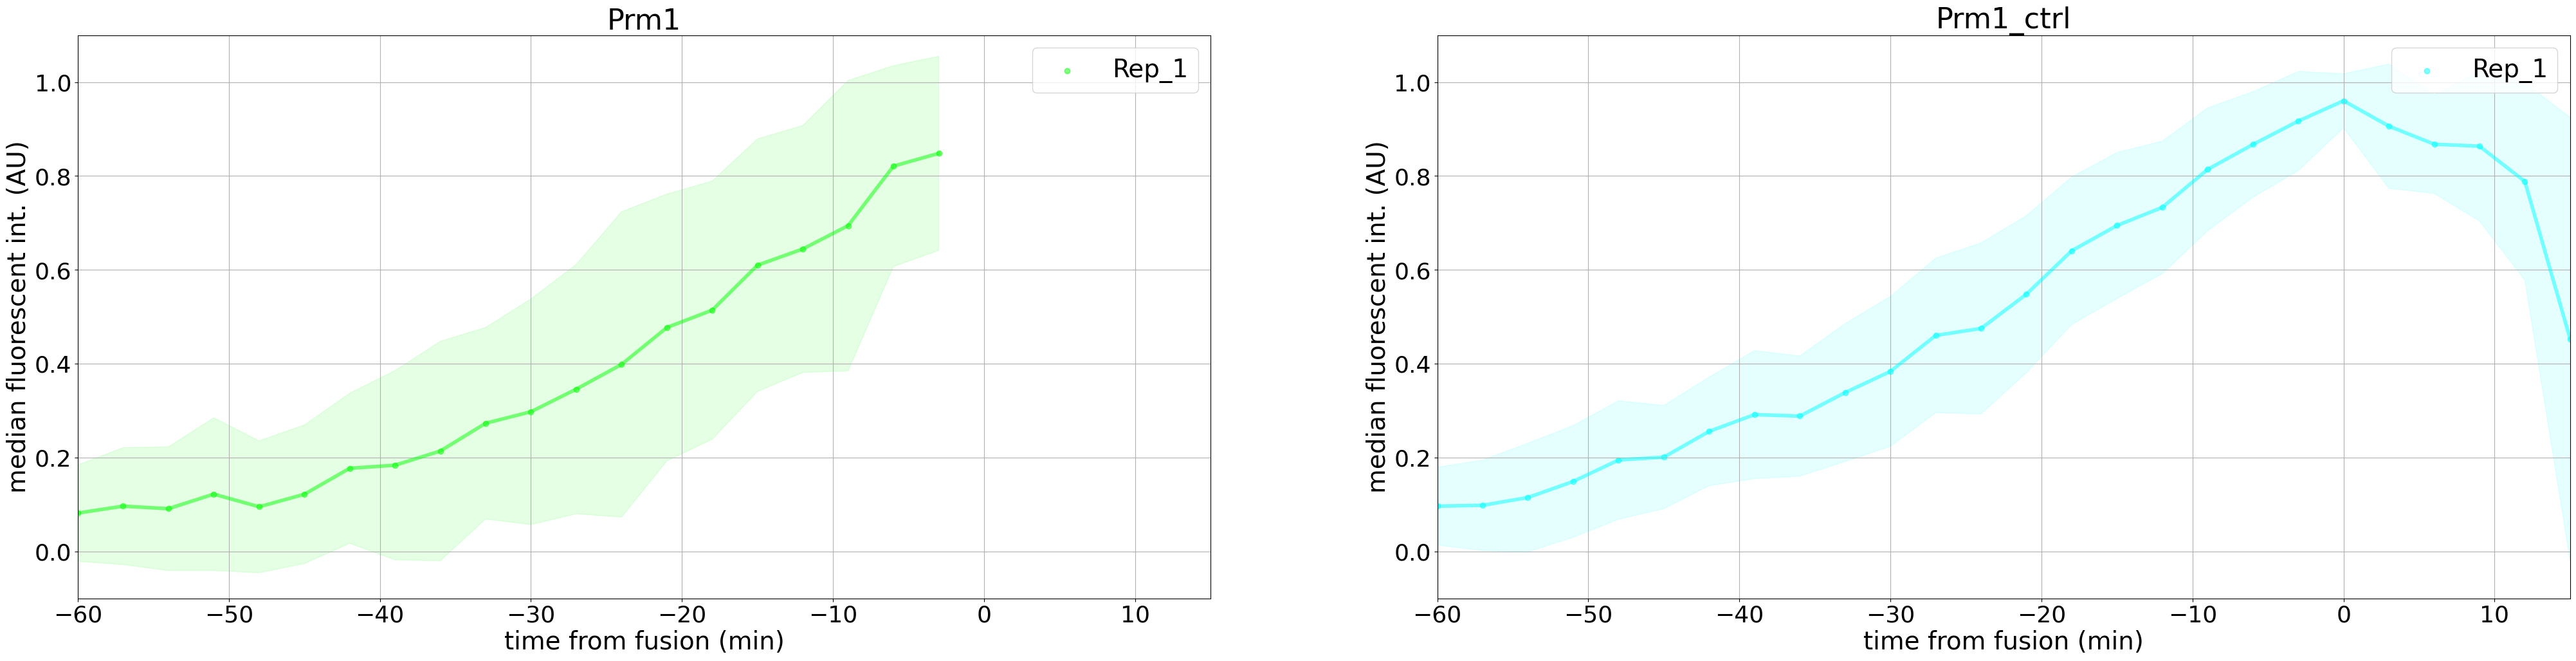

In [5]:
plt.figure(figsize=((25*2,25*np.ceil(n/2))))
for i in range(len(files)):
    plt.subplot(n,2,i+1)
    plot_f_info(Rep_av_POI[i],colPOI[i],files[i],sample='Rep',what='f')
figname=path+'/Graphs/Rep_fluo_int.pdf'
plt.savefig(figname)
plt.show(figname)
plt.close()

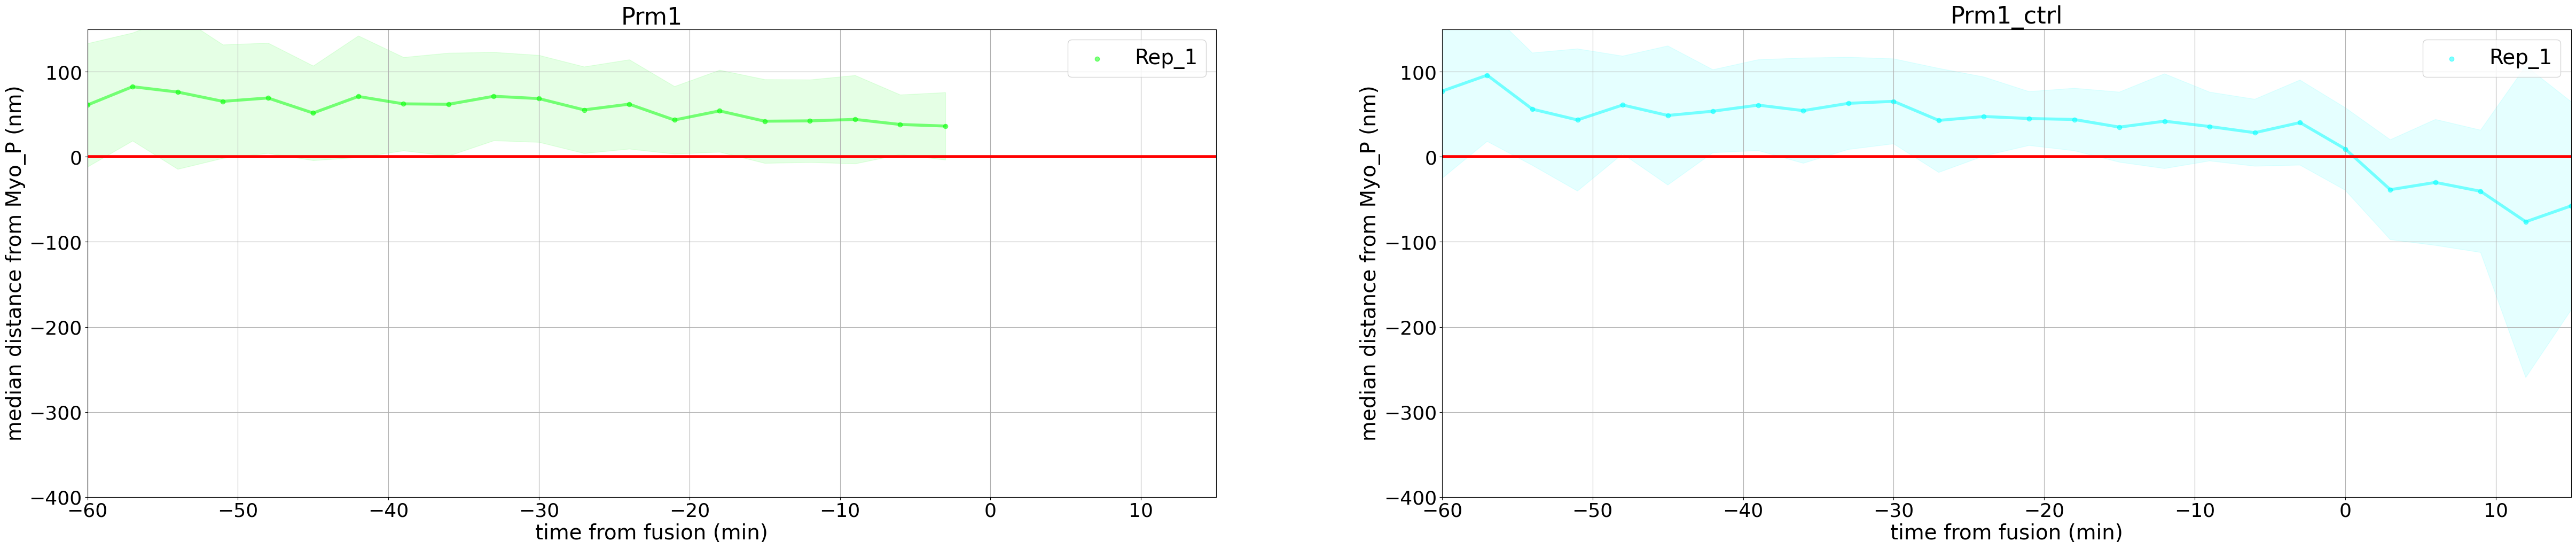

In [6]:
plt.figure(figsize=((30*2,25*np.ceil(n/2))))
for i in range(len(files)):
    plt.subplot(n,2,i+1)
    plot_f_info(Rep_av_distP_POI[i],colPOI[i],files[i],sample='Rep',what='distP')
figname=path+'/Graphs/Rep_distP_POI.pdf'
plt.savefig(figname)
plt.show(figname)
plt.close()


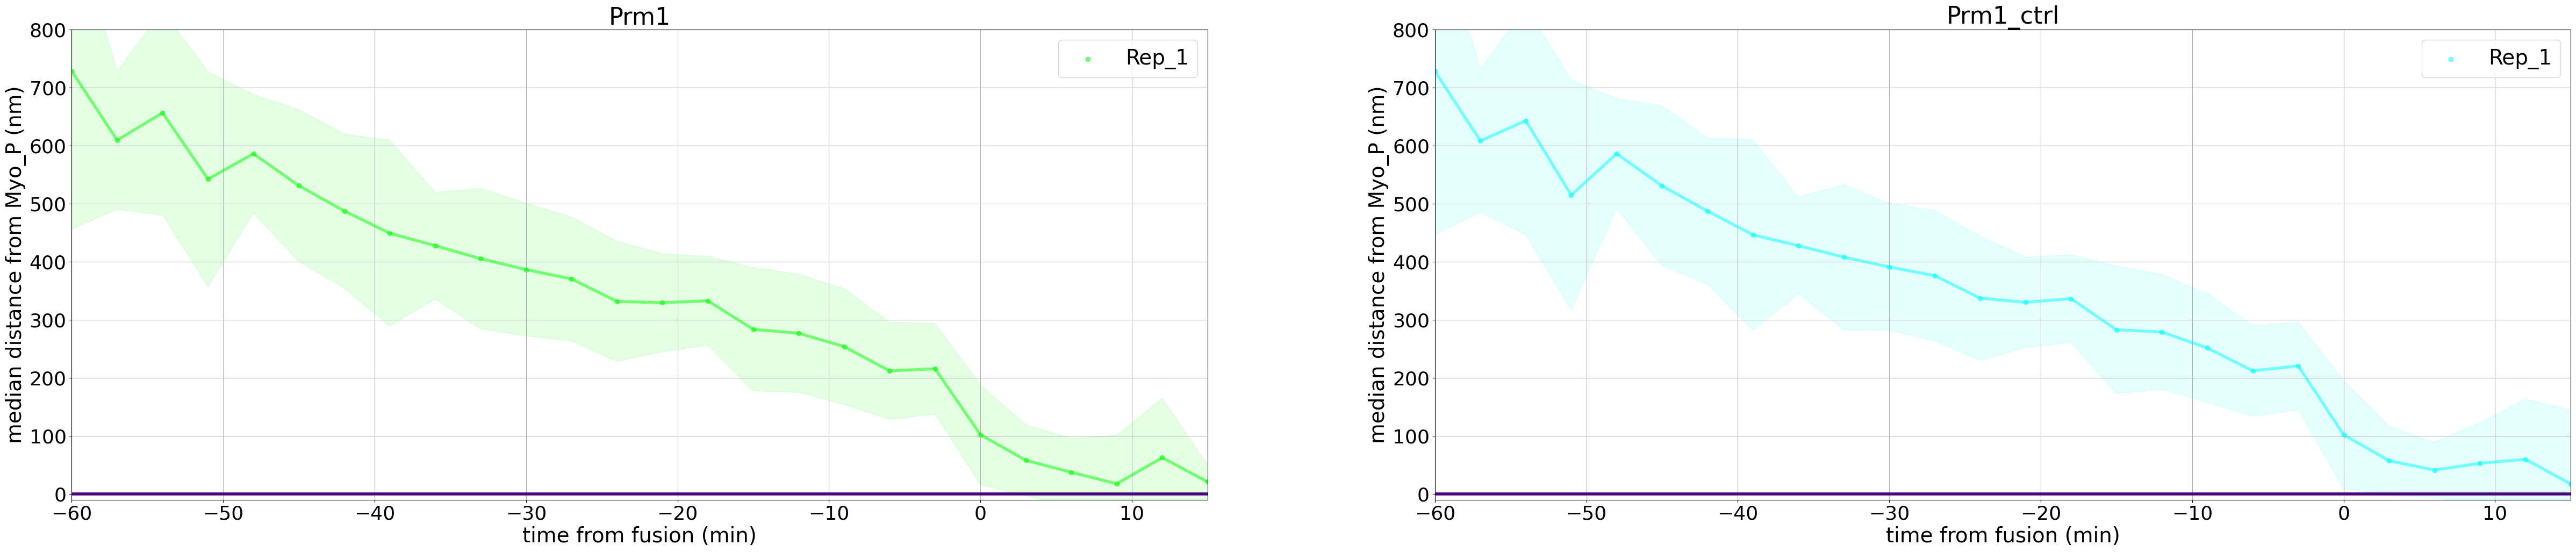

In [7]:
plt.figure(figsize=((30*2,25*np.ceil(n/2))))
for i in range(len(files)):
    plt.subplot(n,2,i+1)
    plot_f_info(Rep_av_distP_M[i],colPOI[i],files[i],sample='Rep',what='distPM')
figname=path+'/Graphs/Rep_distP_M.pdf'
plt.savefig(figname)
plt.show(figname)
plt.close()

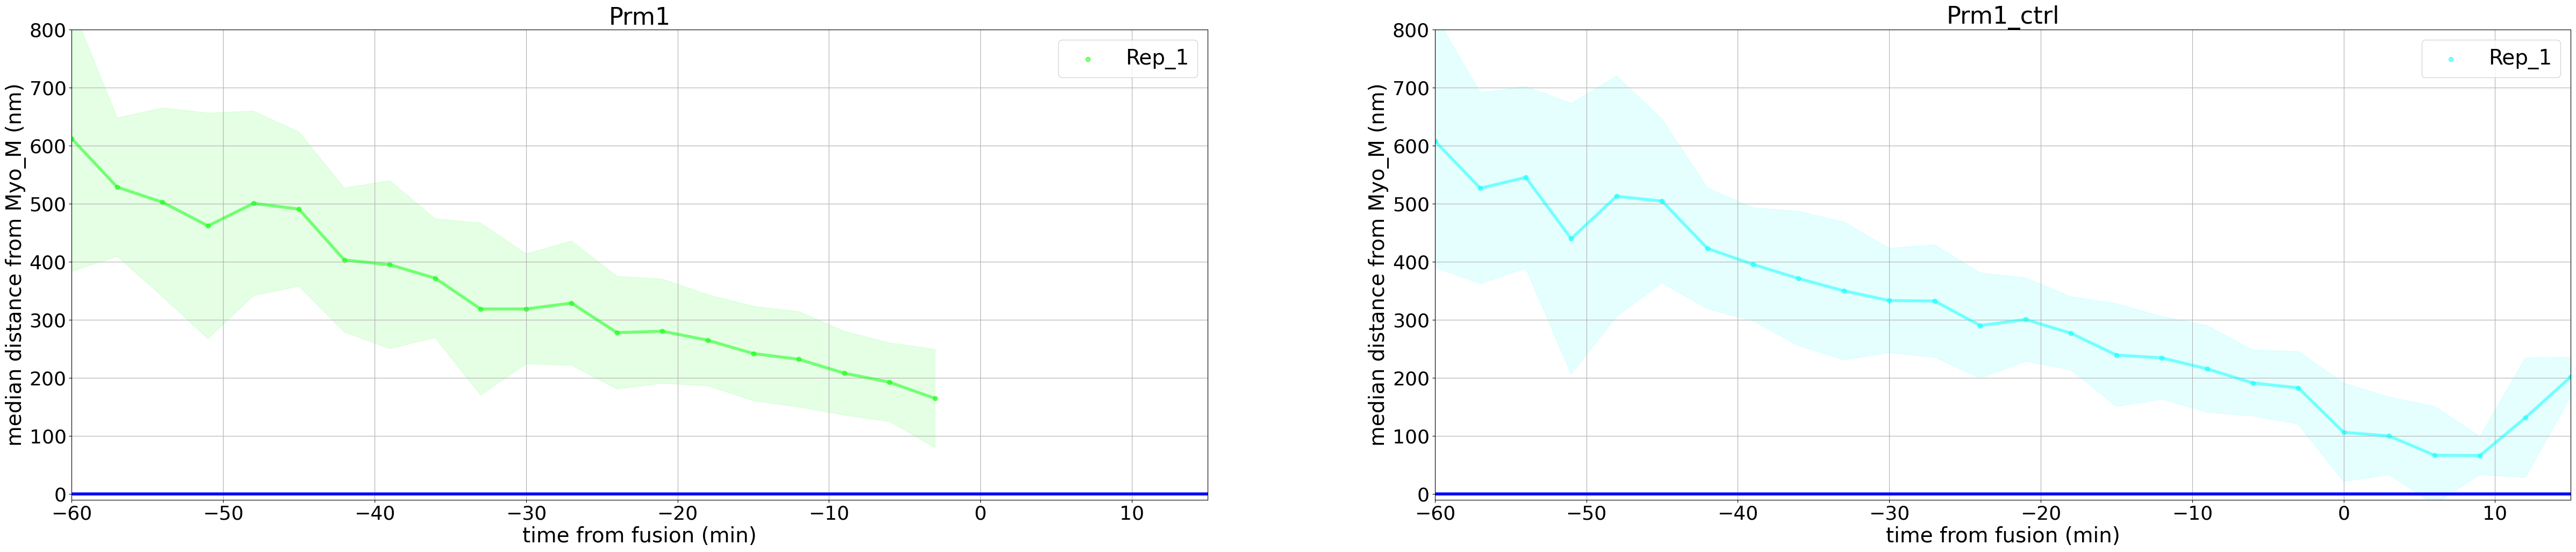

In [8]:
plt.figure(figsize=((30*2,25*np.ceil(n/2))))
for i in range(len(files)):
    plt.subplot(n,2,i+1)
    plot_f_info(Rep_av_distM_POI[i],colPOI[i],files[i],sample='Rep',what='distM')
figname=path+'/Graphs/Rep_distM_POI.pdf'
plt.savefig(figname)
plt.show(figname)
plt.close()

## Plot total

In [9]:
Tot_av_POI=[[] for _ in range(n)]
Tot_av_Myo_P=[[] for _ in range(n)]
Tot_av_Myo_M=[[] for _ in range(n)]

Tot_av_distP_POI=[[] for _ in range(n)]
Tot_av_distP_M=[[] for _ in range(n)]
Tot_av_distM_POI=[[] for _ in range(n)]
 
for i in range (n):
    POI= load_directory(path+files[i] + folder,pattern= 'coordinates_POI.txt', comment_char = '#', t_unit='min' ,t= 1, coord = ( 2 ,3 ) , f = 4, coord_err=(5,6),f_err=7 ,coord_unit = 'nm' )
    Tot_av_POI[i].extend(POI)
    MP= load_directory(path+files[i] +folder,pattern= 'coordinates_Myo_P_.txt', comment_char = '#', t_unit='min' ,t= 1, coord = ( 2 ,3 ) , f = 4, coord_err=(5,6),f_err=7 ,coord_unit = 'nm' )
    Tot_av_Myo_P[i].extend(MP)
    MM= load_directory(path+files[i] +folder,pattern= 'coordinates_Myo_M.txt', comment_char = '#', t_unit='min' ,t= 1, coord = ( 2 ,3 ) , f = 4, coord_err=(5,6),f_err=7 ,coord_unit = 'nm' )
    Tot_av_Myo_M[i].extend(MM)
    
    dir_POI= load_directory(path+files[i] +folder,pattern= 'P_POI.txt', comment_char = '#', t_unit='min' ,t= 0 , f = 1,f_err = 2 ,f_unit= 'nm' )
    Tot_av_distP_POI[i].extend(dir_POI)
    dir_MP= load_directory(path+files[i] + folder,pattern= 'P_M.txt', comment_char = '#', t_unit='min' ,t= 0 , f = 1,f_err = 2 ,f_unit= 'nm' )
    Tot_av_distP_M[i].extend(dir_MP)
    dir_MM= load_directory(path+files[i] +folder,pattern= 'M_POI.txt', comment_char = '#', t_unit='min' ,t= 0 , f = 1,f_err = 2 ,f_unit= 'nm' )
    Tot_av_distM_POI[i].extend(dir_MM)

Average_coordinates_POI.txt

 >> load_directory: The 'intensity_normalisation' applied to the trajectories is 'None' <<


 >> load_directory: The 'intensity_normalisation' applied to the trajectories is 'None' <<


 >> load_directory: The 'intensity_normalisation' applied to the trajectories is 'None' <<

Average_dist_P_POI.txt

 >> load_directory: The 'intensity_normalisation' applied to the trajectories is 'None' <<

Average_dist_P_M.txt

 >> load_directory: The 'intensity_normalisation' applied to the trajectories is 'None' <<

Average_dist_M_POI.txt

 >> load_directory: The 'intensity_normalisation' applied to the trajectories is 'None' <<

Average_coordinates_POI.txt

 >> load_directory: The 'intensity_normalisation' applied to the trajectories is 'None' <<


 >> load_directory: The 'intensity_normalisation' applied to the trajectories is 'None' <<


 >> load_directory: The 'intensity_normalisation' applied to the trajectories is 'None' <<

Average_dist_P_POI.txt

 >> load_directo

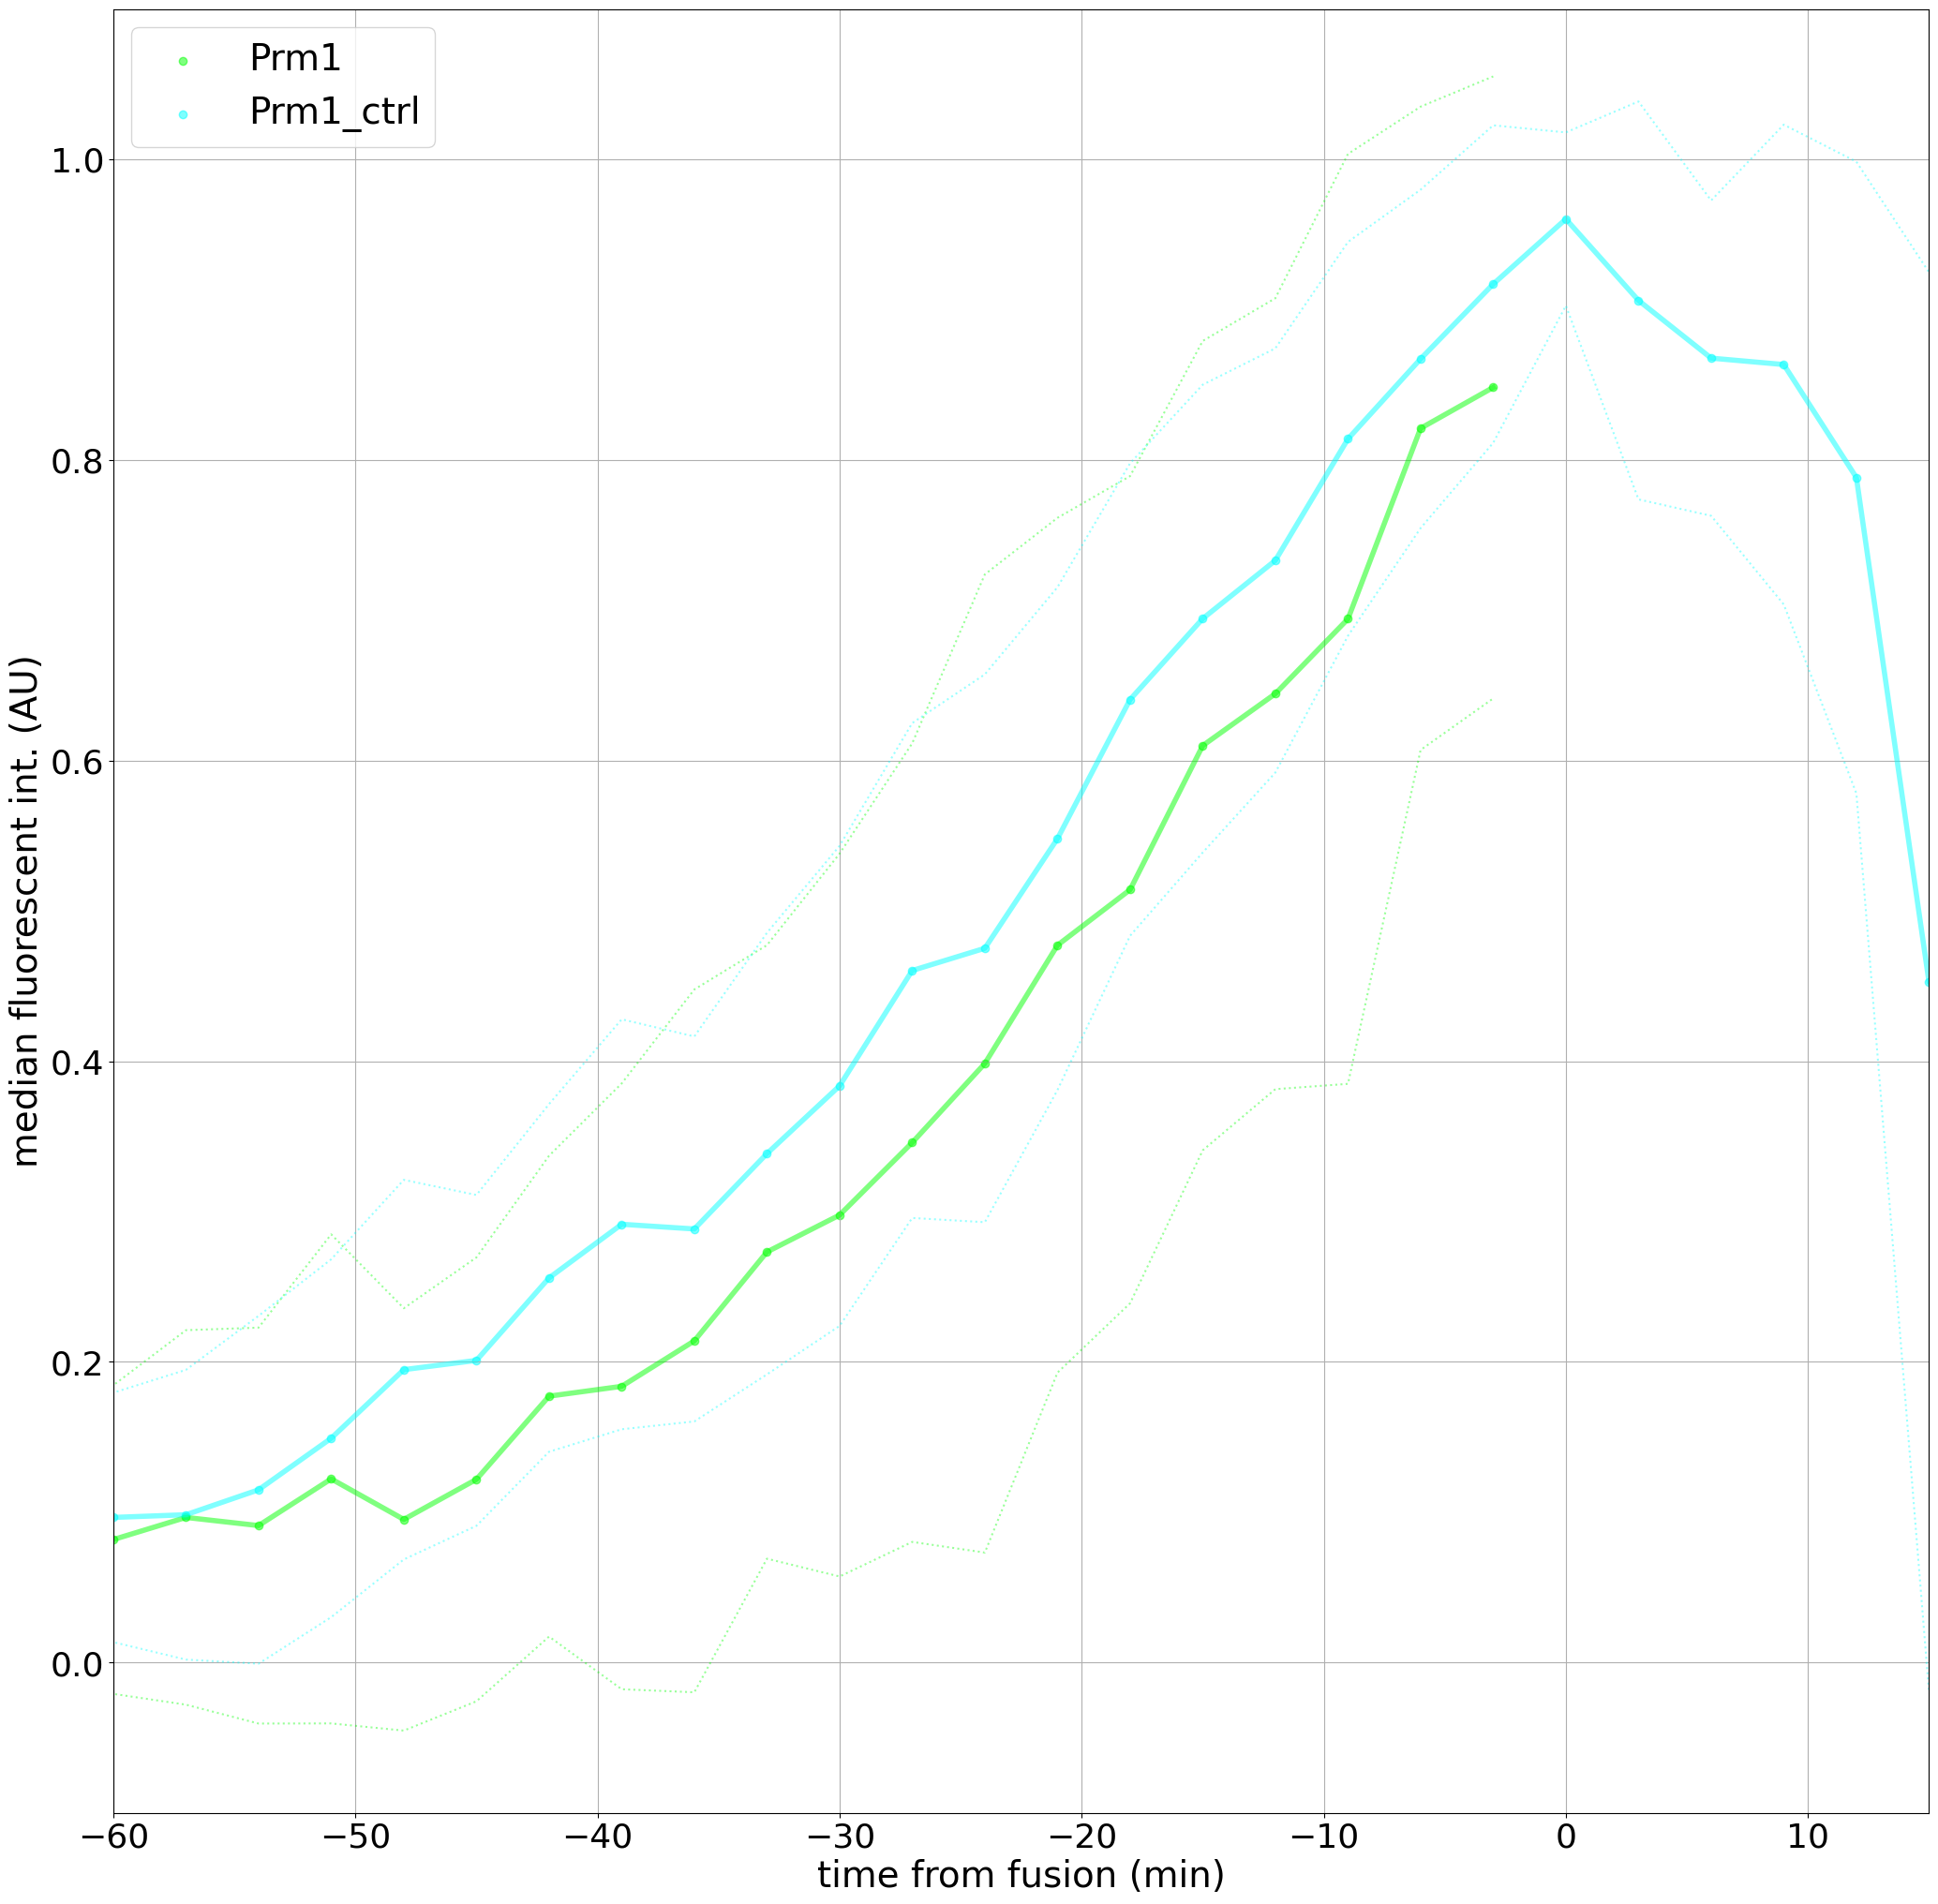

In [10]:
plt.figure(figsize=(25,25))
plot_f_info(Tot_av_POI,colPOI,files,sample="tot",what='f')
figname=path+'/Graphs/tot_fluo_int.pdf'
plt.savefig(figname)
plt.show()
plt.close()

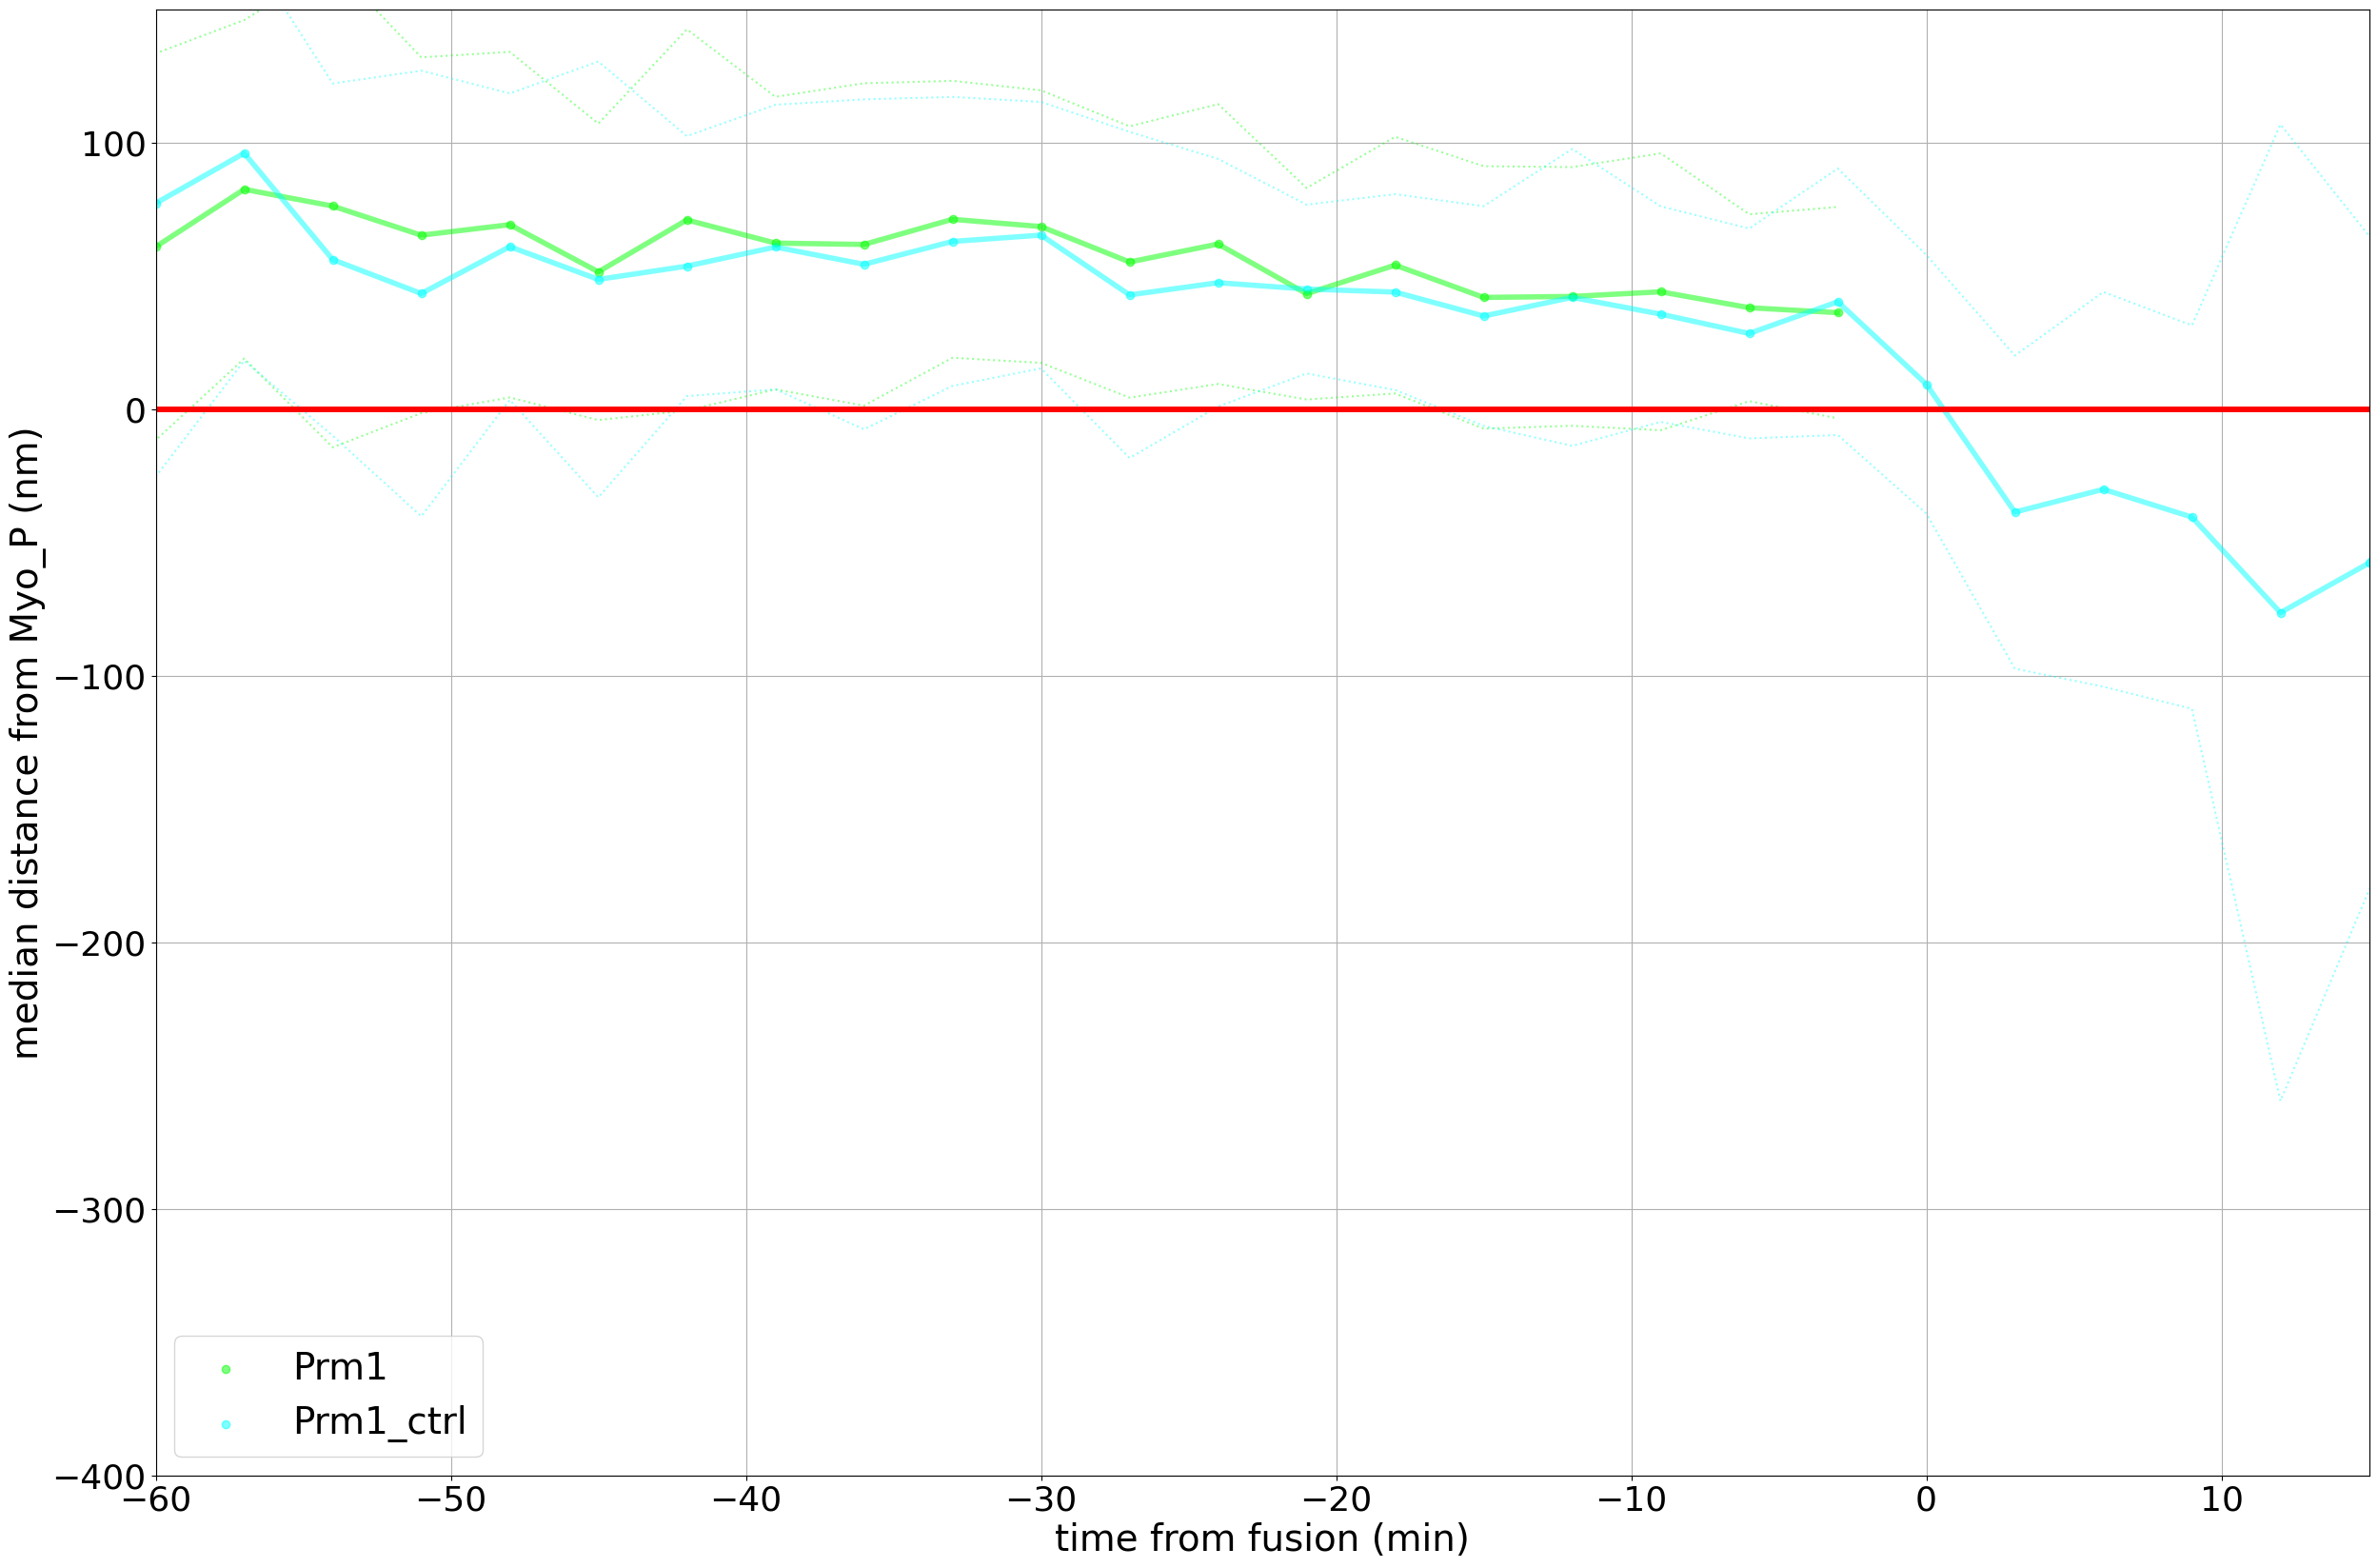

In [11]:
plt.figure(figsize=(30,20))
plot_f_info(Tot_av_distP_POI,colPOI,files,sample="tot",what='distP')
figname=path+'/Graphs/tot_distP_POI.pdf'
plt.savefig(figname)
plt.show()
plt.close()